In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def theta(d):
  return np.arctan(np.sqrt((R**2 * k2 - 2 * d) / (2 * d - R**2 * k1)))

In [18]:
def g(d):
  return stiffness * (2 * d**2 / np.sqrt(k1 * k2) * (np.pi / 2 - np.arctan(np.sqrt(k1 / k2) * np.tan(theta(d)))) + 2 * d* R**2 * theta(d) - R**4 / 4 * k2 * (theta(d) + np.sin(2 * theta(d)) / 2) - R**4 / 4 * k1 * (theta(d) - np.sin(2 * theta(d)) / 2))

In [4]:
def objective(d):
  return np.abs(f - g(d))

In [64]:
delta = 1e-10
def gradient(d):
  return (objective(d + delta) - objective(d)) / delta

In [32]:
k1 = 2
k2 = 1.33
R = 2.25 / 2 * 25.4 / 1000
stiffness = 672e3 / 0.009
f = 70

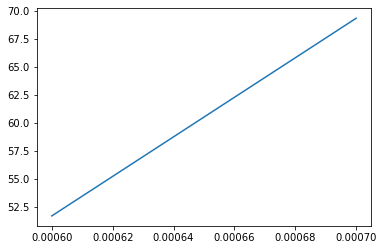

In [41]:
d_vec = np.arange(0.0006, 0.0007, 0.0001)
plt.plot(d_vec, g(d_vec))

In [71]:
d = [0.00061, 0.00062]
gk = [gradient(d[0])]
delta_g = []
delta_x = []
alpha = []
T = 0.0000001

In [72]:
while np.abs(d[-1] - d[-2]) > T:
  gk.append(gradient(d[-1]))
  delta_g.append(gk[-1] - gk[-2])
  delta_x.append(d[-1] - d[-2])
  alpha.append(np.abs(delta_x[-1] / delta_g[-1]))
  d.append(d[-1] - alpha[-1] * gk[-1])

/tmp/ipykernel_1518714/2808533418.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.arctan(np.sqrt((R**2 * k2 - 2 * d) / (2 * d - R**2 * k1)))


In [74]:
d

[0.00061, 0.00062, 0.0016221641308554685, nan]

In [75]:
g(np.array(d))

/tmp/ipykernel_1518714/2808533418.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.arctan(np.sqrt((R**2 * k2 - 2 * d) / (2 * d - R**2 * k1)))


array([53.38425163, 55.09784062,         nan,         nan])

In [63]:
alpha

[5.720608037442292e-11,
 2.6761001617828873e-10,
 2.7065685964585513e-10,
 2.7345149863182495e-10]